In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.ensemble import ExtraTreesClassifier
 
data = pd.read_csv('/content/gapminder.csv', low_memory=False)
 
data['internetuserate'] = pd.to_numeric(data['internetuserate'], errors='coerce')
data['incomeperperson'] = pd.to_numeric(data['incomeperperson'], errors='coerce')
data['employrate'] = pd.to_numeric(data['employrate'], errors='coerce')
data['femaleemployrate'] = pd.to_numeric(data['femaleemployrate'], errors='coerce')
data['polityscore'] = pd.to_numeric(data['polityscore'], errors='coerce')
 
binarydata = data.copy()
 
# convert response variable to binary
 
def internetgrp (row):
    if row['internetuserate'] < data['internetuserate'].median():
        return 0
    else:
        return 1

binarydata['internetuserate'] = binarydata.apply (lambda row: internetgrp (row),axis=1)
 
# Clean the dataset
binarydata_clean = binarydata.dropna()

In [13]:
predictors = binarydata_clean[['incomeperperson','employrate','femaleemployrate','polityscore']]
targets = binarydata_clean.internetuserate
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

from sklearn.ensemble import RandomForestClassifier

classifier_r=RandomForestClassifier(n_estimators=25)
classifier_r=classifier_r.fit(pred_train,tar_train)
predictions_r=classifier_r.predict(pred_test)

In [14]:
sklearn.metrics.confusion_matrix(tar_test,predictions_r)

array([[31,  5],
       [ 5, 20]])

In [15]:
sklearn.metrics.accuracy_score(tar_test, predictions_r)

0.8360655737704918

In [16]:
model_r = ExtraTreesClassifier()
model_r.fit(pred_train,tar_train)

ExtraTreesClassifier()

In [17]:
model_r.feature_importances_

array([0.48268333, 0.16223994, 0.1481663 , 0.20691043])

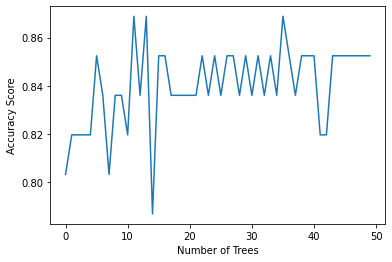

In [18]:
trees=range(50)
accuracy=np.zeros(50)
 
for idx in range(len(trees)):
    classifier_r=RandomForestClassifier(n_estimators=idx + 1)
    classifier_r=classifier_r.fit(pred_train,tar_train)
    predictions_r=classifier_r.predict(pred_test)
    accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions_r)

plt.cla()
plt.plot(trees, accuracy)
plt.ylabel('Accuracy Score')
plt.xlabel('Number of Trees')
plt.show()
